In [1]:
import tensorflow as tf

from tensorflow import keras

2024-01-21 15:39:20.212469: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [8]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [3]:
model_path = '/home/jovyan/examples/examples/tensorflow/Seed3/model-00058-0.32378-0.29181-.h5'

In [4]:
model = keras.models.load_model(model_path)

2024-01-21 15:39:26.394327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 15:39:26.401343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 15:39:26.401935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 15:39:26.402851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 120, 120, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 120, 120, 3)      0         
 tion)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 118, 118, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                  

In [73]:
test_path = './data/test'

In [74]:
img = load_img(test_path + '/003d61042.png', target_size=(120, 120))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
# img_array /= 255.0

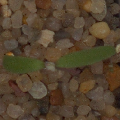

In [75]:
img

In [76]:
# Make predictions
predictions = model.predict(img_array)

1/1 [==============================] - 0s 16ms/step


In [77]:
predictions

array([[7.9424040e-05, 6.8874584e-08, 2.2340471e-05, 5.5422487e-07,
        1.4871557e-04, 9.9772483e-01, 5.9127524e-06, 2.7168537e-05,
        4.7542864e-07, 2.2871220e-07, 5.9173527e-07, 1.9897535e-03]],
      dtype=float32)

In [16]:
labels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

In [79]:
# Get the class with the highest probability
score = tf.nn.softmax(predictions[0])

In [80]:
dict(zip(labels, np.array(score)))

{'Black-grass': 0.07292195,
 'Charlock': 0.072916165,
 'Cleavers': 0.07291779,
 'Common Chickweed': 0.072916195,
 'Common wheat': 0.072927,
 'Fat Hen': 0.19775622,
 'Loose Silky-bent': 0.07291659,
 'Maize': 0.07291814,
 'Scentless Mayweed': 0.072916195,
 'Shepherds Purse': 0.07291617,
 'Small-flowered Cranesbill': 0.0729162,
 'Sugar beet': 0.073061384}

In [81]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Fat Hen with a 19.78 percent confidence.


### Convert to Tf-lite

In [82]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f_out:
  f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqyfllly7/assets


INFO:tensorflow:Assets written to: /tmp/tmpqyfllly7/assets
2024-01-21 16:11:11.271953: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-01-21 16:11:11.271992: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-01-21 16:11:11.272799: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpqyfllly7
2024-01-21 16:11:11.277507: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-01-21 16:11:11.277537: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpqyfllly7
2024-01-21 16:11:11.293927: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-01-21 16:11:11.297794: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-01-21 16:11:11.456127: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

In [83]:
!ls -lh

total 45M
drwxrwsr-x 4 jovyan jovyan 4.0K Jan 20 13:10 data
-rw-rw-r-- 1 jovyan jovyan 1.2M Jan 21 15:54 image-classification.ipynb
-rw-r--r-- 1 jovyan jovyan  44M Jan 21 16:11 model.tflite
drwxrwsr-x 2 jovyan jovyan 4.0K Jan 20 13:52 Seed2
drwxrwsr-x 2 jovyan jovyan 4.0K Jan 20 14:06 Seed3
-rw-rw-r-- 1 jovyan jovyan 6.5K Jan 20 10:16 single-gpu-tensorflow.ipynb
-rw-rw-r-- 1 jovyan jovyan  48K Jan 21 16:11 tf_lite.py.ipynb


In [96]:
import tensorflow.lite as tflite

In [110]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.allocate_tensors()

In [111]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [112]:
interpreter.set_tensor(input_index, img_array)
interpreter.invoke()

preds_lite = interpreter.get_tensor(output_index)
score = tf.nn.softmax(preds_lite[0])
dict(zip(labels, np.array(score)))

{'Black-grass': 0.072921954,
 'Charlock': 0.072916165,
 'Cleavers': 0.0729178,
 'Common Chickweed': 0.0729162,
 'Common wheat': 0.07292701,
 'Fat Hen': 0.19775622,
 'Loose Silky-bent': 0.07291659,
 'Maize': 0.07291815,
 'Scentless Mayweed': 0.0729162,
 'Shepherds Purse': 0.07291619,
 'Small-flowered Cranesbill': 0.07291621,
 'Sugar beet': 0.07306139}

### Removing TF Dependencies

In [3]:
from PIL import Image


In [4]:
img_path = './data/test/003d61042.png'

In [5]:
with Image.open(img_path) as img:
    img = img.resize((120, 120), Image.NEAREST)

/tmp/ipykernel_5362/2561461416.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((120, 120), Image.NEAREST)


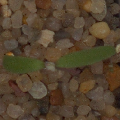

In [6]:
img

In [117]:
x = np.array(img, dtype='float32')
X = np.array([x])

In [118]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [119]:
preds

array([[7.9424033e-05, 6.8874705e-08, 2.2340471e-05, 5.5422635e-07,
        1.4871554e-04, 9.9772471e-01, 5.9127519e-06, 2.7168531e-05,
        4.7542903e-07, 2.2871281e-07, 5.9173516e-07, 1.9897539e-03]],
      dtype=float32)

In [121]:
score = tf.nn.softmax(preds[0])
dict(zip(labels, np.array(score)))

{'Black-grass': 0.072921954,
 'Charlock': 0.072916165,
 'Cleavers': 0.0729178,
 'Common Chickweed': 0.0729162,
 'Common wheat': 0.07292701,
 'Fat Hen': 0.19775622,
 'Loose Silky-bent': 0.07291659,
 'Maize': 0.07291815,
 'Scentless Mayweed': 0.0729162,
 'Shepherds Purse': 0.07291619,
 'Small-flowered Cranesbill': 0.07291621,
 'Sugar beet': 0.07306139}

### Simpler way of doing this

In [122]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.6 MB/s eta 0:00:00a 0:00:01


In [1]:
import tflite_runtime.interpreter as tflite

In [2]:
interpreter = tflite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [9]:
x = np.array(img, dtype='float32')
X = np.array([x])

In [17]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [18]:
preds

array([[7.9424033e-05, 6.8874705e-08, 2.2340471e-05, 5.5422635e-07,
        1.4871554e-04, 9.9772471e-01, 5.9127519e-06, 2.7168531e-05,
        4.7542903e-07, 2.2871281e-07, 5.9173516e-07, 1.9897539e-03]],
      dtype=float32)

In [21]:
dict(zip(labels, preds[0]))

{'Black-grass': 7.942403e-05,
 'Charlock': 6.8874705e-08,
 'Cleavers': 2.2340471e-05,
 'Common Chickweed': 5.5422635e-07,
 'Common wheat': 0.00014871554,
 'Fat Hen': 0.9977247,
 'Loose Silky-bent': 5.912752e-06,
 'Maize': 2.7168531e-05,
 'Scentless Mayweed': 4.7542903e-07,
 'Shepherds Purse': 2.287128e-07,
 'Small-flowered Cranesbill': 5.9173516e-07,
 'Sugar beet': 0.001989754}